### [ 과대적합 및 과소적합 ]

In [88]:
# 과대적합(overfitting) : 훈련세트에서는 높은 성능을 얻지만 테스트 세트 성능이 낮음
# 과소적합(underfitting) : 테스트 세트의 성능이 향상될 여지가 있는 경우

In [2]:
# 최적의 모델을 만들기 위해서는 과대적합과 과소적합 사이에서 균형을 잡아야 함
# 이를 위해 적절한 에포크 횟수 동안 모델을 훈련해야 함

In [3]:
# 과대적합을 막는 가장 좋은 방법은 더 많은 훈련 데이터를 사용하는 것
# 많은 데이터에서 훈련한 모델은 자연적으로 일반화 성능이 더 좋음

In [4]:
# 데이터를 더 준비할 수 없을 때 그다음으로 가장 좋은 방법은 규제(regularization)
# 모델이 저장할 수 있는 정보의 양과 종류에 제약을 부과하는 방법

# 규제 기법 : 가중치 규제, 드롭아웃 등

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.1


#### < 데이터셋 다운로드 >

In [7]:
NUM_WORDS = 1000

In [8]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [9]:
# enumerate() : 리스트가 있는 경우 순서와 리스트의 값을 전달하는 기능을 가짐
# 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 
# 인덱스 값을 포함하는 enumerate 객체를 리턴

In [10]:
def multi_hot_sequences(sequences, dimension):
    
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    
    return results

In [13]:
# 멀티-핫 인코딩은 정수 시퀀스를 0과 1로 이루어진 벡터로 변환
# 시퀀스 [3, 5]를 인덱스 3과 5만 1이고 나머지는 모두 0인 10,000 차원 벡터로 변환

In [14]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

In [ ]:
# 단어 인덱스는 빈도 순으로 정렬되어 있음 -> 인덱스 0에 가까울수록 1이 많이 등장

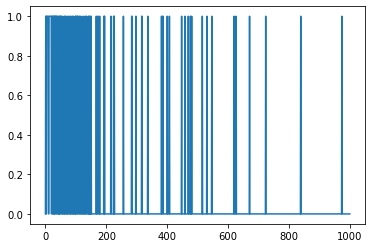

In [15]:
plt.plot(train_data[0])

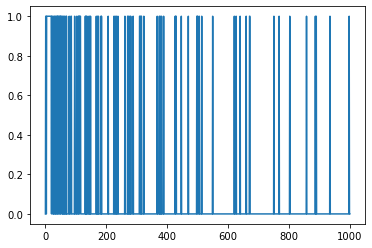

In [19]:
plt.plot(train_data[1000])

In [20]:
# 인덱스 0에 가까울수록 1이 많이 등장

#### < 과대적합 >

In [21]:
# 과대적합 방지 -> 가장 간단한 방법은 규모를 축소하는 것
# 즉, 모델에 있는 학습 가능한 파라미터의 수를 줄이기
# (모델 파라미터는 layer(층) 개수와 unit(유닛)의 개수에 의해 결정됨)

In [22]:
# 딥러닝 에서는 모델의 학습 가능한 파라미터의 수를 종종 모델의 '용량'이라고 함
# 직관적으로 보면, 많은 파라미터를 가진 모델이 더 많은 기억용량을 가짐

In [23]:
# "너무 많은 용량"과 "충분하지 않은 용량" 사이의 균형을 잡는 것이 중요

In [24]:
# 알맞은 모델의 크기를 찾으려면 비교적 적의 수의 층과 파라미터로 시작해서
# 검증 손실이 감소할 때까지 새로운 층을 추가하거나 층을 크기를 늘리는 것이 좋음

#### < 기준모델 생성 >

In [45]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [46]:
baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

In [47]:
baseline_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                16016     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [48]:
# verbose -> 0(silent), 1(progress bar), 2(one line per epoch)

In [49]:
baseline_history = baseline_model.fit(train_data, train_labels, epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.5779 - accuracy: 0.7082 - binary_crossentropy: 0.5779 - val_loss: 0.4295 - val_accuracy: 0.8228 - val_binary_crossentropy: 0.4295
Epoch 2/20
49/49 - 0s - loss: 0.3676 - accuracy: 0.8443 - binary_crossentropy: 0.3676 - val_loss: 0.3420 - val_accuracy: 0.8561 - val_binary_crossentropy: 0.3420
Epoch 3/20
49/49 - 0s - loss: 0.3200 - accuracy: 0.8661 - binary_crossentropy: 0.3200 - val_loss: 0.3297 - val_accuracy: 0.8619 - val_binary_crossentropy: 0.3297
Epoch 4/20
49/49 - 0s - loss: 0.3069 - accuracy: 0.8725 - binary_crossentropy: 0.3069 - val_loss: 0.3268 - val_accuracy: 0.8612 - val_binary_crossentropy: 0.3268
Epoch 5/20
49/49 - 0s - loss: 0.3007 - accuracy: 0.8772 - binary_crossentropy: 0.3007 - val_loss: 0.3266 - val_accuracy: 0.8616 - val_binary_crossentropy: 0.3266
Epoch 6/20
49/49 - 0s - loss: 0.2932 - accuracy: 0.8797 - binary_crossentropy: 0.2932 - val_loss: 0.3271 - val_accuracy: 0.8615 - val_binary_crossentropy: 0.3271
Epoch 7/20
49/49 - 0s - loss

#### < 작은 모델 생성 >

In [50]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

In [52]:
smaller_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 4004      
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [53]:
smaller_history = smaller_model.fit(train_data, train_labels, epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6300 - accuracy: 0.6546 - binary_crossentropy: 0.6300 - val_loss: 0.5687 - val_accuracy: 0.7541 - val_binary_crossentropy: 0.5687
Epoch 2/20
49/49 - 0s - loss: 0.5332 - accuracy: 0.8070 - binary_crossentropy: 0.5332 - val_loss: 0.5135 - val_accuracy: 0.8266 - val_binary_crossentropy: 0.5135
Epoch 3/20
49/49 - 0s - loss: 0.4933 - accuracy: 0.8444 - binary_crossentropy: 0.4933 - val_loss: 0.4886 - val_accuracy: 0.8426 - val_binary_crossentropy: 0.4886
Epoch 4/20
49/49 - 0s - loss: 0.4700 - accuracy: 0.8594 - binary_crossentropy: 0.4700 - val_loss: 0.4731 - val_accuracy: 0.8496 - val_binary_crossentropy: 0.4731
Epoch 5/20
49/49 - 0s - loss: 0.4544 - accuracy: 0.8674 - binary_crossentropy: 0.4544 - val_loss: 0.4628 - val_accuracy: 0.8508 - val_binary_crossentropy: 0.4628
Epoch 6/20
49/49 - 0s - loss: 0.4410 - accuracy: 0.8721 - binary_crossentropy: 0.4410 - val_loss: 0.4528 - val_accuracy: 0.8545 - val_binary_crossentropy: 0.4528
Epoch 7/20
49/49 - 0s - loss

#### < 큰 모델 생성 >

In [54]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [55]:
bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

In [56]:
bigger_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               512512    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [57]:
bigger_history = bigger_model.fit(train_data, train_labels, epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4141 - accuracy: 0.8089 - binary_crossentropy: 0.4141 - val_loss: 0.3489 - val_accuracy: 0.8506 - val_binary_crossentropy: 0.3489
Epoch 2/20
49/49 - 1s - loss: 0.2947 - accuracy: 0.8772 - binary_crossentropy: 0.2947 - val_loss: 0.3228 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3228
Epoch 3/20
49/49 - 1s - loss: 0.2288 - accuracy: 0.9085 - binary_crossentropy: 0.2288 - val_loss: 0.3550 - val_accuracy: 0.8482 - val_binary_crossentropy: 0.3550
Epoch 4/20
49/49 - 2s - loss: 0.1141 - accuracy: 0.9638 - binary_crossentropy: 0.1141 - val_loss: 0.4138 - val_accuracy: 0.8460 - val_binary_crossentropy: 0.4138
Epoch 5/20
49/49 - 1s - loss: 0.0255 - accuracy: 0.9960 - binary_crossentropy: 0.0255 - val_loss: 0.5340 - val_accuracy: 0.8468 - val_binary_crossentropy: 0.5340
Epoch 6/20
49/49 - 1s - loss: 0.0058 - accuracy: 0.9995 - binary_crossentropy: 0.0058 - val_loss: 0.6098 - val_accuracy: 0.8461 - val_binary_crossentropy: 0.6098
Epoch 7/20
49/49 - 1s - loss

#### < 훈련 손실과 검증 손실 그래프 >

In [58]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

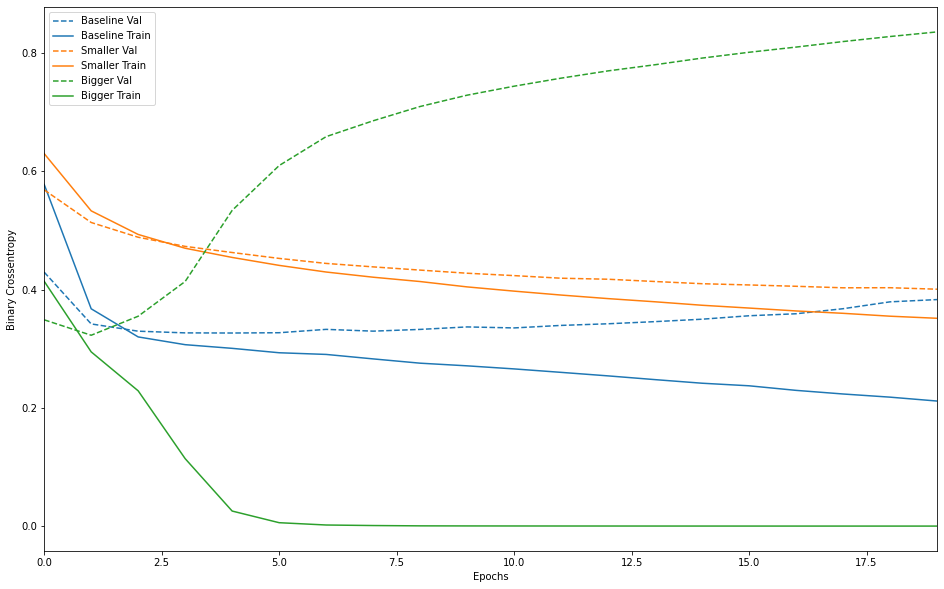

In [59]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [60]:
# 실선은 훈련 손실이고 점선은 검증 손실 
# 낮은 검증 손실이 더 좋은 모델

In [61]:
# 작은 네트워크가 기준 모델보다 더 늦게 과대적합이 시작
# 또한 과대적합이 시작되고 훨씬 천천히 성능이 감소

In [63]:
# 큰 네트워크는 거의 바로 첫 번째 에포크 이후에 과대적합이 시작되고 
# 훨씬 더 심각하게 과대적합됨을 확인할 수 있음

In [64]:
# 네트워크의 용량이 많을수록 훈련 세트를 더 빠르게 모델링할 수 있음
# 트워크의 용량이 많을수록 훈련 손실이은 낮아지지만, 그만큼 더 쉽게 과대적합됨

#### < 과대적합 방지 -> 가중치 규제 >

In [65]:
# 가중치가 단순한 모델이 과대적합되는 경향이 작음

In [66]:
# 과대적합을 완화시키는 일반적인 방법은 가중치가 작은 값을 가지도록 
# 네트워크의 복잡도에 제약을 가하는 것
# -> 가중치 값의 분포를 좀 더 균일하게 만들어 줌

In [67]:
# 네트워크의 손실 함수에 큰 가중치에 해당하는 비용을 추가

In [68]:
# L1 규제 : 가중치의 절대값에 비례하는 비용이 추가됨
# 즉, 가중치의 L1 노름(norm)을 추가

# L1 규제는 일부 가중치 파라미터를 0으로 만듦

In [69]:
# L2 규제 : 가중치의 제곱에 비례하는 비용이 추가됨
# 즉, 가중치의 L2 노름(norm)을 추가
# 신경망에서는 L2 규제를 가중치 감쇠(weight decay)라고도 부름

# 가중치 파라미터를 제한하지만 완전히 0으로 만들지는 않음
# -> 이것이 L2 규제를 더 많이 사용하는 이유 중 하나임

In [70]:
# tf.keras는 가중치 규제 객체를 층의 키워드 매개변수에 전달하여 가중치에 규제 추가

# kernel_regularizer=keras.regularizers.l2(0.001)

# l2(0.001)는 네트워크의 전체 손실에 층에 있는 가중치 행렬의 모든 값이 
# 0.001 * weight_coefficient_value**2만큼 더해진다는 의미

# 이런 페널티(penalty)는 훈련할 때만 추가됨
# 따라서 테스트 단계보다 훈련 단계에서 네트워크 손실이 훨씬 더 큼

In [71]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [72]:
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

In [73]:
l2_model_history = l2_model.fit(train_data, train_labels, epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6236 - accuracy: 0.7137 - binary_crossentropy: 0.5796 - val_loss: 0.4823 - val_accuracy: 0.8217 - val_binary_crossentropy: 0.4392
Epoch 2/20
49/49 - 0s - loss: 0.4199 - accuracy: 0.8472 - binary_crossentropy: 0.3759 - val_loss: 0.3921 - val_accuracy: 0.8542 - val_binary_crossentropy: 0.3479
Epoch 3/20
49/49 - 0s - loss: 0.3695 - accuracy: 0.8669 - binary_crossentropy: 0.3259 - val_loss: 0.3768 - val_accuracy: 0.8575 - val_binary_crossentropy: 0.3340
Epoch 4/20
49/49 - 0s - loss: 0.3564 - accuracy: 0.8694 - binary_crossentropy: 0.3145 - val_loss: 0.3745 - val_accuracy: 0.8591 - val_binary_crossentropy: 0.3336
Epoch 5/20
49/49 - 0s - loss: 0.3478 - accuracy: 0.8750 - binary_crossentropy: 0.3076 - val_loss: 0.3676 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3285
Epoch 6/20
49/49 - 0s - loss: 0.3433 - accuracy: 0.8749 - binary_crossentropy: 0.3050 - val_loss: 0.3697 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3323
Epoch 7/20
49/49 - 0s - loss

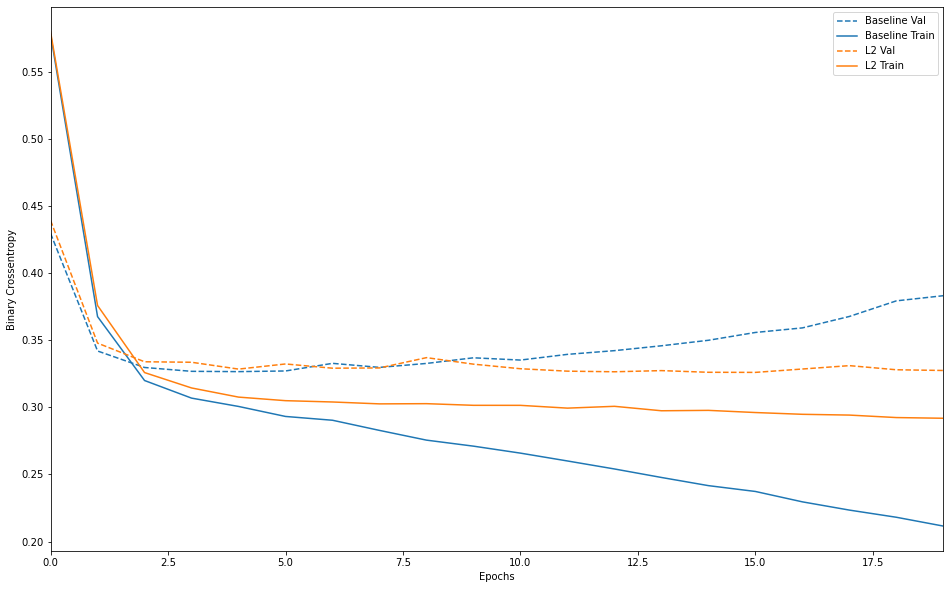

In [74]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)]) # 두 모델의 파라미터 개수는 같음

In [76]:
# 실선은 훈련 손실이고 점선은 검증 손실 
# 낮은 검증 손실이 더 좋은 모델

In [75]:
# L2 규제를 적용한 모델이 기본 모델보다 과대적합에 더 잘 견디고 있음을 확인

#### < 과대적합 방지 -> 드롭아웃 추가 >

In [77]:
# 드롭아웃을 층에 적용하면 훈련하는 동안 층을 출력 특성을 랜덤하게 끔 
# (즉, 0으로 만듧)

In [78]:
# 드롭아웃 비율 -> 0이 되는 특성의 비율, 보통 0.2~0.5 사이를 사용

In [79]:
# 테스트 단계에서는 어떤 유닛도 드롭아웃 하지 않음
# 훈련 단계보다 더 많은 유닛이 활성화되기 떼문에
# 균형을 맞추기 위해 층을 출력 값을 드롭아웃 비율만큼 줄임

In [80]:
# tf.keras 에서는 Dropout 층을 이용해 네트워크에 추가할 수 있음
# 이 층은 바로 이전 층의 출력에 드롭아웃을 적용

In [81]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [82]:
dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

In [83]:
dpt_model_history = dpt_model.fit(train_data, train_labels, epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 0s - loss: 0.6854 - accuracy: 0.5439 - binary_crossentropy: 0.6854 - val_loss: 0.6320 - val_accuracy: 0.7406 - val_binary_crossentropy: 0.6320
Epoch 2/20
49/49 - 0s - loss: 0.6070 - accuracy: 0.6625 - binary_crossentropy: 0.6070 - val_loss: 0.4943 - val_accuracy: 0.8207 - val_binary_crossentropy: 0.4943
Epoch 3/20
49/49 - 0s - loss: 0.5038 - accuracy: 0.7607 - binary_crossentropy: 0.5038 - val_loss: 0.3892 - val_accuracy: 0.8420 - val_binary_crossentropy: 0.3892
Epoch 4/20
49/49 - 0s - loss: 0.4424 - accuracy: 0.8060 - binary_crossentropy: 0.4424 - val_loss: 0.3517 - val_accuracy: 0.8525 - val_binary_crossentropy: 0.3517
Epoch 5/20
49/49 - 0s - loss: 0.4103 - accuracy: 0.8243 - binary_crossentropy: 0.4103 - val_loss: 0.3366 - val_accuracy: 0.8554 - val_binary_crossentropy: 0.3366
Epoch 6/20
49/49 - 0s - loss: 0.3910 - accuracy: 0.8386 - binary_crossentropy: 0.3910 - val_loss: 0.3278 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3278
Epoch 7/20
49/49 - 0s - loss

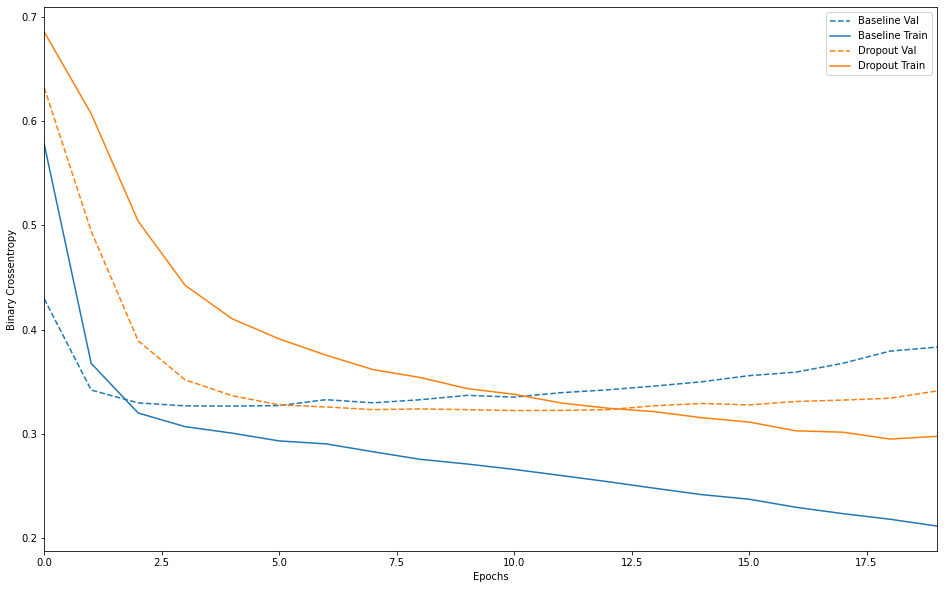

In [84]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

In [85]:
# 드롭아웃을 추가한 모델의 과대적합 정도가 작음

#### < 과대적합 방지 >

In [86]:
# 더 만흔 훈련 데이터 수집
# 네트워크 용량을 줄이기
# 가중치 규제 추가
# 드롭아웃 추가

In [87]:
# 데이터 증식 (data-augmentation)
# 배치 정규화 (batch normalization)